In [1]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2

In [2]:
# Reading the csv file and transforming the data using the code from EX1:
original_df = pd.read_csv('CVD_cleaned.csv')

## Part A - Linear Regression

### Q.1

#### Explanatory Variables:
* x1: FriedPotato Consumption (Continuous)
* x2: Depression (Binary)
* x3: Smoking History  (Binary)

#### Explained Variable:
* Y = Alcohol Consumption (Continuous)

### Research Question:
* Do FriedPotato Consumption, Depression and Smoking History affect Alcohol Consumption?

In [3]:
# Transforming df
original_df = original_df[['FriedPotato_Consumption', 'Depression', 'Smoking_History', 'Alcohol_Consumption']]
original_df['Depression'] = original_df['Depression'].replace({'Yes': 1, 'No': 0})
original_df['Smoking_History'] = original_df['Smoking_History'].replace({'Yes': 1, 'No': 0})
original_df  

,FriedPotato_Consumption,Depression,Smoking_History,Alcohol_Consumption
0,12.0,0,1,0.0
1,4.0,0,0,0.0
2,16.0,0,0,4.0
3,8.0,0,0,0.0
4,0.0,0,1,0.0
...,...,...,...,...
308849,0.0,0,0,4.0
308850,4.0,0,0,8.0
308851,4.0,1,1,4.0
308852,0.0,0,0,3.0


## Q.2

In [4]:
# sample 200 rows:
df = original_df.sample(n=200, random_state=42)

## Q 3.1

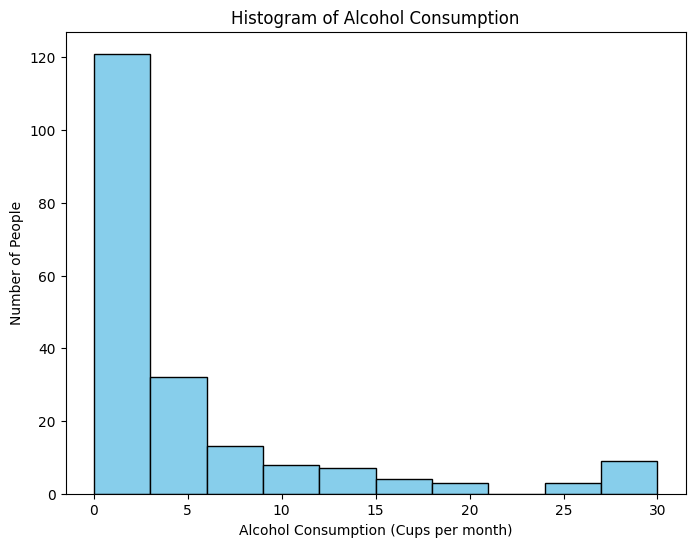

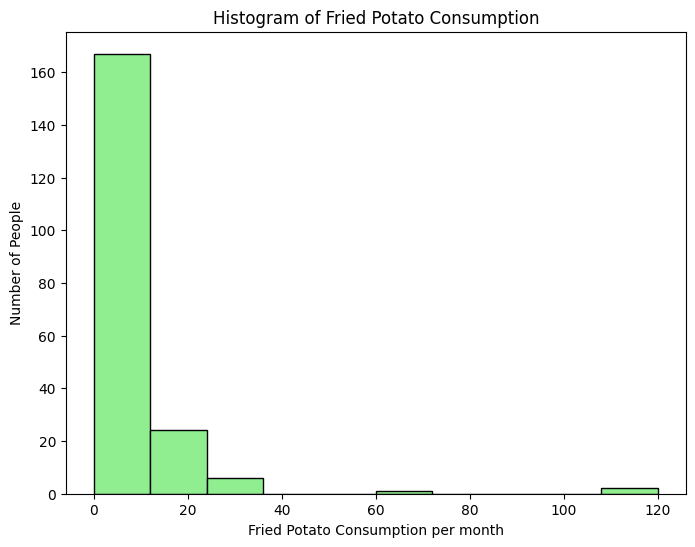

Missing values in Fried Potato Consumption: 0
Missing values in Alcohol Consumption: 0


In [5]:
# Plot histogram for 'Alcohol_Consumption'
plt.figure(figsize=(8, 6))
df['Alcohol_Consumption'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Alcohol Consumption')
plt.xlabel('Alcohol Consumption (Cups per month)')
plt.ylabel('Number of People')
plt.grid(False)
plt.show()

# Plot histogram for 'FriedPotato_Consumption'
plt.figure(figsize=(8, 6))
df['FriedPotato_Consumption'].hist(bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Fried Potato Consumption')
plt.xlabel('Fried Potato Consumption per month')
plt.ylabel('Number of People')
plt.grid(False)
plt.show()
missing_values_potato = df['FriedPotato_Consumption'].isnull().sum()
missing_values_alcohol = df['Alcohol_Consumption'].isnull().sum()

print("Missing values in Fried Potato Consumption:", missing_values_potato)
print("Missing values in Alcohol Consumption:", missing_values_alcohol)

In [6]:
print(pd.crosstab(df['Smoking_History'], columns='count'))
print()
print(pd.crosstab(df['Depression'], columns='count'))


col_0            count
Smoking_History       
0                  119
1                   81

col_0       count
Depression       
0             164
1              36


## Q 3.2
1. Alcohol Consumption & Fried Potato:
* We can notice some outliers and also that the data is not symmetrical.
* We can see that there are no missing values. 
* We can assume data come from gaussian distribution with right tail.

2. Smoking_History & Depression
* No outliers since variables are binary
* We can see that data is not symmetrical.
* No missing values (sum up to 200).


## Q 3.3

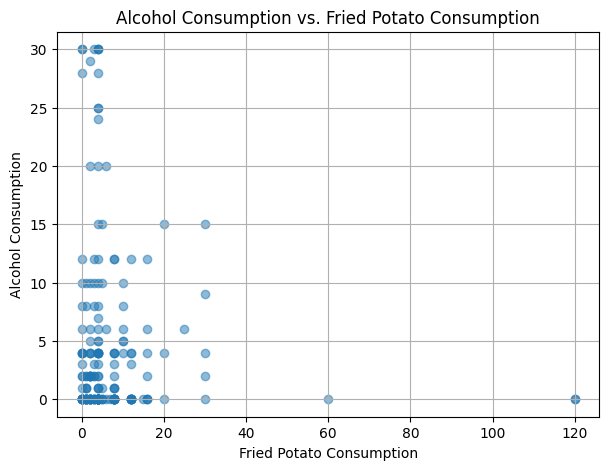

We can't assume positive nor negative correlation between Alcohol Consumption and Fried Potato Consumption


In [7]:
# Plotting
plt.figure(figsize=(7, 5))
plt.scatter(x=df['FriedPotato_Consumption'], y=df['Alcohol_Consumption'], alpha=0.5)
plt.title('Alcohol Consumption vs. Fried Potato Consumption')
plt.xlabel('Fried Potato Consumption')
plt.ylabel('Alcohol Consumption')
plt.grid(True)
plt.show()
print("We can't assume positive nor negative correlation between Alcohol Consumption and Fried Potato Consumption")

/var/folders/6_/dhlq5ftj4c76n7p9cz2cjkyw0000gn/T/ipykernel_13905/1039594022.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Depression'], y=df['Alcohol_Consumption'], palette=colors)


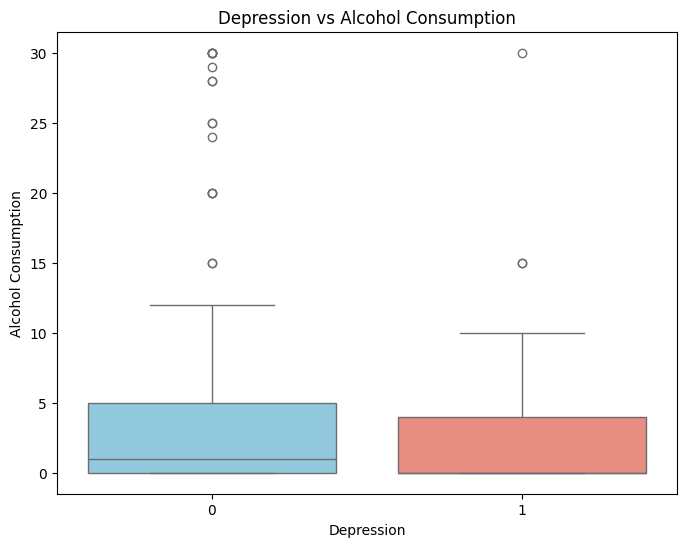

In [8]:
# Define colors for each category of Depression
colors = ['skyblue', 'salmon']

# Box plot of Alcohol Consumption by Depression with different colors
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Depression'], y=df['Alcohol_Consumption'], palette=colors)
plt.title("Depression vs Alcohol Consumption")
plt.xlabel("Depression")
plt.ylabel("Alcohol Consumption")
plt.show()

/var/folders/6_/dhlq5ftj4c76n7p9cz2cjkyw0000gn/T/ipykernel_13905/476013996.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Smoking_History'], y=df['Alcohol_Consumption'], palette=colors, legend=False)


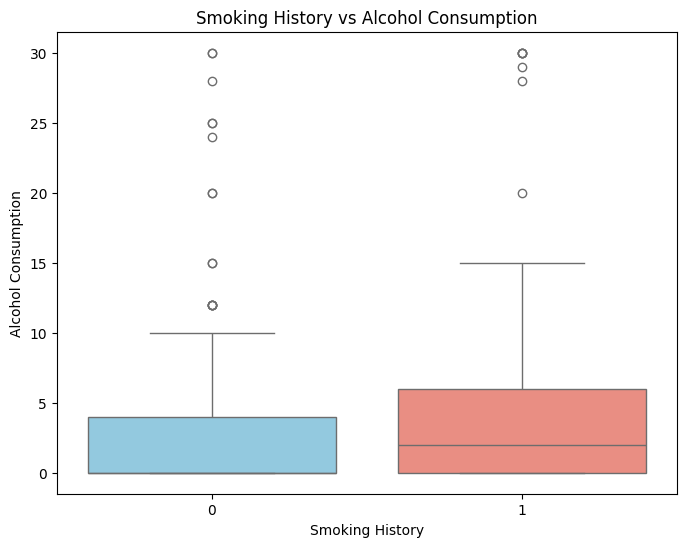

In [9]:
colors = ['skyblue', 'salmon']

# Box plot of Alcohol Consumption by Depression with different colors
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Smoking_History'], y=df['Alcohol_Consumption'], palette=colors, legend=False)
plt.title("Smoking History vs Alcohol Consumption")
plt.xlabel("Smoking History")
plt.ylabel("Alcohol Consumption")

plt.show()

## Q 4

In [10]:
y = df['Alcohol_Consumption'].to_numpy()
x = df[['Depression', 'Smoking_History', 'FriedPotato_Consumption']]
x.insert(0, 'x0', 1)
x = x.to_numpy()

xTx = x.T @ x
xTx_inv = np.linalg.inv(xTx)
xTy = x.T @ y

b = xTx_inv @ xTy

print(f"y = {b[0]} + {b[1]} * x1 + {b[2]} * x2 + {b[3]} * x3")

y = 4.408915277098989 + -1.311272987454263 * x1 + 1.2845022838125948 * x2 + -0.03862935845846112 * x3


if x1 (Depression) increases by 1, y decreases by 1.311.

if x2 (Smoking_History) is 1, y increases by 1.284.

if x3 (FriedPotato_Consumption) increases by 1, y decreases by 0.03.


## Q 5

In [11]:
# Define the number of observations and predictors
n = len(y)
k = x.shape[1] - 1  # Number of predictors 
p = x.shape[1]
y_pred = x @ b

# Calculate the Total Sum of Squares (SST)
SST = np.sum((y - np.mean(y))**2)

# Calculate the Regression Sum of Squares (SSR)
SSR = np.sum((y_pred - np.mean(y))**2)

# Calculate the Residual Sum of Squares (SSE)
SSE = np.sum((y - y_pred)**2)

# Calculate the Degrees of Freedom for Regression (dfR) and Residual (dfE)
dfR = k
dfE = n - p 

# Calculate the Mean Square Regression (MSR) and Mean Square Error (MSE)
MSR = SSR / dfR
MSE = SSE / dfE

# Calculate the F-statistic
F_statistic = MSR / MSE

# Calculate the p-value
p_value = 1 - stats.f.cdf(F_statistic, dfR, dfE) # maybe there is a mistake *****************************

# Create the ANOVA table
anova_table = pd.DataFrame({
    'Source of Variation': ['Regression', 'Residual', 'Total'],
    'Sum of Squares': [SSR, SSE, SST],
    'Degrees of Freedom': [dfR, dfE, n - 1],
    'Mean Square': [MSR, MSE, ''],
    'F-statistic': [F_statistic, '', ''],
    'p-value': [p_value, '', '']
})

print("ANOVA Table:")
anova_table


ANOVA Table:


,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Square,F-statistic,p-value
0,Regression,178.749944,3,59.583315,1.095531,0.352174
1,Residual,10659.970056,196,54.387602,,
2,Total,10838.720000,199,,,


__From the ANOVA table, the observed p-value appears to be relatively high, indicating weak support against the null hypothesis.__

In [12]:
R_squared = 1 - (SSR / SST)
R_squared_adj = 1 - (SSR / SST) * ((n - 1) / (n - p))

print("R-squared:", R_squared)
print("Adjusted R-squared:", R_squared_adj)

R-squared: 0.9835082053731967
Adjusted R-squared: 0.9832557799452354


# Q 6
### Confidence Intervals

In [13]:
def all_data(df):
    # Calculating b0, b1, b2, b3 for all data
    df = df[['FriedPotato_Consumption', 'Depression', 'Smoking_History', 'Alcohol_Consumption']]
    df['Depression'] = df['Depression'].replace({'Yes': 1, 'No': 0})
    df['Smoking_History'] = df['Smoking_History'].replace({'Yes': 1, 'No': 0})
    y = df['Alcohol_Consumption'].to_numpy()
    x = df[['Depression', 'Smoking_History', 'FriedPotato_Consumption']]
    x.insert(0, 'x0', 1)
    x = x.to_numpy()
    xTx = x.T @ x
    xTx_inv = np.linalg.inv(xTx)
    xTy = x.T @ y
    b = xTx_inv @ xTy
    return b

In [15]:
alpha = 0.05
z_alpha = stats.norm.ppf(1 - alpha / 2)
P = np.dot(x.dot(xTx_inv), x.T)
e = (np.eye(n) - P).dot(y)
sigma_squared = (1 / (n - p)) * np.sum(e**2)
cov = xTx_inv
df_all = pd.read_csv('/Users/yardennahum/Statistics 2/Project 1/CVD_cleaned.csv')
b_all = all_data(df_all)
for i in range(4):
    se_estimated = np.sqrt((sigma_squared * cov[i][i]))
    CI_beta_i = [b[i] - z_alpha * se_estimated,b[i] + z_alpha * se_estimated]
    print(f"CI for beta {i} is: {CI_beta_i}")
    print(f"Is CI of beta {i} in sample data contains the estimator of original data: "
      f"{b_all[i] <= CI_beta_i[1] and b_all[i] >= CI_beta_i[0]}\n")
    

CI for beta 0 is: [2.943083740058616, 5.874746814139361]
Is CI of beta 0 in sample data contains the estimator of original data: True

CI for beta 1 is: [-3.9943570320234962, 1.3718110571149702]
Is CI of beta 1 in sample data contains the estimator of original data: True

CI for beta 2 is: [-0.806599737693894, 3.375604305319084]
Is CI of beta 2 in sample data contains the estimator of original data: True

CI for beta 3 is: [-0.11517437817120994, 0.037915661254287705]
Is CI of beta 3 in sample data contains the estimator of original data: True



/var/folders/6_/dhlq5ftj4c76n7p9cz2cjkyw0000gn/T/ipykernel_13905/554367195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Depression'] = df['Depression'].replace({'Yes': 1, 'No': 0})
/var/folders/6_/dhlq5ftj4c76n7p9cz2cjkyw0000gn/T/ipykernel_13905/554367195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoking_History'] = df['Smoking_History'].replace({'Yes': 1, 'No': 0})


# Q 7 
## We will use Wald test in order to check whether b0, b1 b2 and b3 are not equal to zero.
* n = 200 (sample size)
* alpha = 0.05
* H0: bi = 0 (i = 0, 1 ,2 3)
* H1: b_i != 0 
* T.S: W = (bi_ols - bi) / se
* RR: |W| > z_alpha

In [62]:
# Wald test for b0, b1, b2, b3:
for i, beta in enumerate(b):
    se_bi = sigma_squared * cov[i][i]
    wald_statistic = beta / se_bi
    ci_len = z_alpha * se_bi
    p_value = 2 * (1 - stats.norm.cdf(abs(wald_statistic)))
    print(f"Reject Ho: {abs(wald_statistic) > z_alpha}")
    print(f"p_value is: {p_value}\n")


Reject Ho: True
p_value is: 3.1086244689504383e-15

Reject Ho: False
p_value is: 0.4841057504315054

Reject Ho: False
p_value is: 0.2591317882478177

Reject Ho: True
p_value is: 0.0



# Q 8

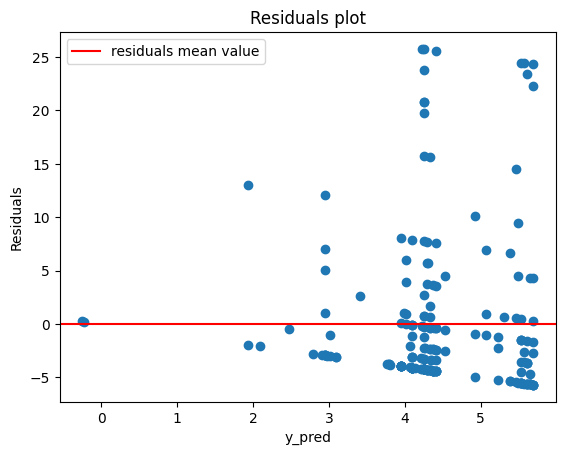

In [63]:
y_pred = x.dot(b)
res = y - y_pred
plt.scatter(y_pred, res)
plt.axhline(y=np.mean(res), color='red', label="residuals mean value")
plt.xlabel("y_pred")
plt.ylabel("Residuals")
plt.title("Residuals plot")
plt.legend()
plt.show()



### Based on the observed pattern in the graph, it's apparent that the assumption of constant variance cannot be upheld. Additionally, the systematic deviation of data points above zero suggests a bias within the model.

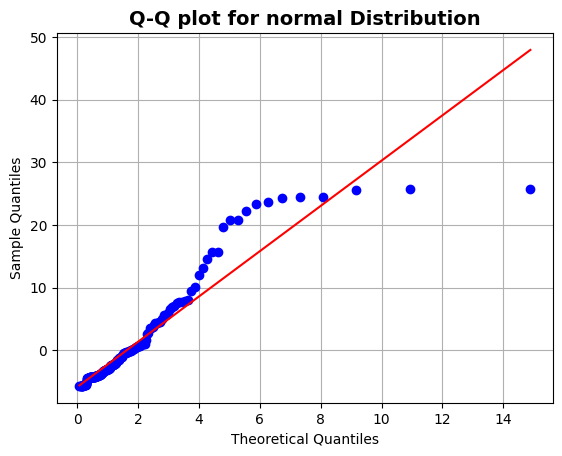

In [32]:
# Create Q-Q plot with lognormal distribution
stats.probplot(res, dist="lognorm", sparams=(1,), plot=plt)
plt.title("Q-Q plot for normal Distribution", fontweight="bold", fontsize=14)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

### We can conclude from this graph that the residuals are approximately normally distributed.

## Q 9

In [64]:
sampled_df = df
# Get the indices of the previously sampled 200 samples
sampled_indices = sampled_df.index

# Drop the previously sampled indices from the original dataframe
remaining_df = original_df.drop(sampled_indices)

# Sample 1000 samples from the remaining dataframe
new_sample_df = remaining_df.sample(n=1000, random_state=42)  # Adjust the random_state as needed

# Now new_sample_df contains 1000 samples not included in the previous 200 samples


### Q9.1

In [65]:
x_new = new_sample_df[['Depression', 'Smoking_History', 'FriedPotato_Consumption']]
x_new.insert(0, 'x0', 1)
x_new = x_new.to_numpy()

# Calculating predicted y-values for each sample in x_new
y_pred_new = x_new.dot(b)
y_new = new_sample_df['Alcohol_Consumption'].to_numpy()


### Q 9.2 + 9.3

In [66]:
alpha = 0.05
n = 1000
p = 4
x_newTx_new = x_new.T @ x_new
xTx_inv = np.linalg.inv(x_newTx_new)
xTy = x_new.T @ y_new
z_alpha = stats.norm.ppf(1 - alpha / 2)

res = y_new - y_pred_new
sigma_squared = (1 / (n - p)) * np.sum(res**2)
counter = 0 
for i in range(len(y_new)):
    yi = y_pred_new[i]
    x_c = x_new[i]
    x_c_xt = np.dot(x_new[i] @ cov, x_new[i].T)
    ci_elem = z_alpha * (sigma_squared * x_c_xt + sigma_squared)**0.5    
    CI = [yi - ci_elem, yi + ci_elem]
    if y_new[i] >= CI[0] and y_new[i] <= CI[1]:
        counter += 1
print(f"Appeared in the CI {(counter / n) * 100}%")   

Appeared in the CI 90.2%


**This outcome might imply that our model's performance is inadequate. A satisfactory model would ideally yield around 95% accuracy.**

## Q 10

We will use Mallow's statistic and R adjusted in order to compare the models

In [67]:
def calc_mallow(y, y_pred, b):
    # Get the number of observations
    n = len(y)

    # Calculate the residual sum of squares (RSS)
    RSS = np.sum((y - y_pred) ** 2)

    # Calculate the error variance
    sigma_sq = RSS / (n - len(b))

    # Calculate Mallow's Cp
    Cp = (1 / n) * (RSS + 2 * len(b) * sigma_sq)
    
    return Cp

old_model_mallow = calc_mallow(y, x.dot(b), b)
R_squared_adj = 1 - (SSR / SST) * ((n - 1) / (n - p))

print("Old Model:")
print("Mallow's Cp:", old_model_mallow)    
print("Adjusted R-squared:", R_squared_adj)

Old Model:
Mallow's Cp: 55.47535437172156
Adjusted R-squared: 0.9834585312929955


In [68]:
# Creating Z12, Z13, Z23:
sampled_df['z12'] = sampled_df['Depression'] * sampled_df['Smoking_History']
sampled_df['z13'] = sampled_df['Depression'] * sampled_df['FriedPotato_Consumption']
sampled_df['z23'] = sampled_df['Smoking_History'] * sampled_df['FriedPotato_Consumption']

y = sampled_df['Alcohol_Consumption'].to_numpy()
x = sampled_df[['Depression', 'Smoking_History', 'FriedPotato_Consumption', 'z12', 'z13', 'z23']]
x.insert(0, 'x0', 1)
x = x.to_numpy()

xTx = x.T @ x
xTx_inv = np.linalg.inv(xTx)
xTy = x.T @ y
b_inter = xTx_inv @ xTy
y_pred_inter = x.dot(b_inter)
print("The new model is:\n ")
print(f"y = {b_inter[0]} + {b_inter[1]} * x1 + {b_inter[2]} * x2 + {b_inter[3]} * x3 + {b_inter[4]} * z12 +" 
      f"{b_inter[5]} * z13 + {b_inter[6]} * z23")

The new model is:
 
y = 4.435848175898315 + -1.3775366729829113 * x1 + 1.554107764572669 * x2 + -0.05032642864752958 * x3 + -0.8021865514126102 * z12 +0.05775137355005145 * z13 + -0.0233546732996699 * z23


In [69]:
# Calculating R adjusted:

# Calculate the Total Sum of Squares (SST)
SST = np.sum((y - np.mean(y))**2)

# Calculate the Regression Sum of Squares (SSR)
SSR = np.sum((x @ b_inter - np.mean(y))**2)

R_squared_adj = 1 - (SSR / SST) * ((n - 1) / (n - p))
cp = calc_mallow(y, y_pred_inter, b_inter)
print("New Model:")
print("Mallow's Cp:", cp)    
print("Adjusted R-squared:", R_squared_adj)

New Model:
Mallow's Cp: 57.0589407389388
Adjusted R-squared: 0.9816083230921959


__Both models have very similar R adjusted and mallow's statistic, but by mallows satistic we should prefer the first model over the new one.__

__The difference in R adjusted is not significant.__

# Part 2 Logistic Regression

## Q 1

#### Explanatory Variables:
* x1: Height (Continuous)
* x2: Weight (Continuous)
* x3: Smoking History (Binary)

#### Explained Variable:
* Y = Heart Disease (Binary)

### Research Question:
* Is there an association between height, weight, smoking history, and the occurrence of heart disease?

In [70]:
df_original_2 = pd.read_csv('/Users/yardennahum/Statistics 2/Project 1/CVD_cleaned.csv')\
                [['Height_(cm)','Weight_(kg)', 'Smoking_History', 'Heart_Disease' ]]

# Transforming df
df_original_2['Smoking_History'] = df_original_2['Smoking_History'].replace({'Yes': 1, 'No': 0})
 
df_original_2['Heart_Disease'] = df_original_2['Heart_Disease'].replace({'Yes': 1, 'No': 0})
df_original_2

,Height_(cm),Weight_(kg),Smoking_History,Heart_Disease
0,150.0,32.66,1,0
1,165.0,77.11,0,1
2,163.0,88.45,0,0
3,180.0,93.44,0,1
4,191.0,88.45,1,0
...,...,...,...,...
308849,168.0,81.65,0,0
308850,180.0,69.85,0,0
308851,157.0,61.23,1,0
308852,183.0,79.38,0,0


## Q 2

In [71]:
df_sam_2 = df_original_2.sample(n=200, random_state=42)

## Q 3.1
* In part 1 we have already examined the variable "Smoking History."

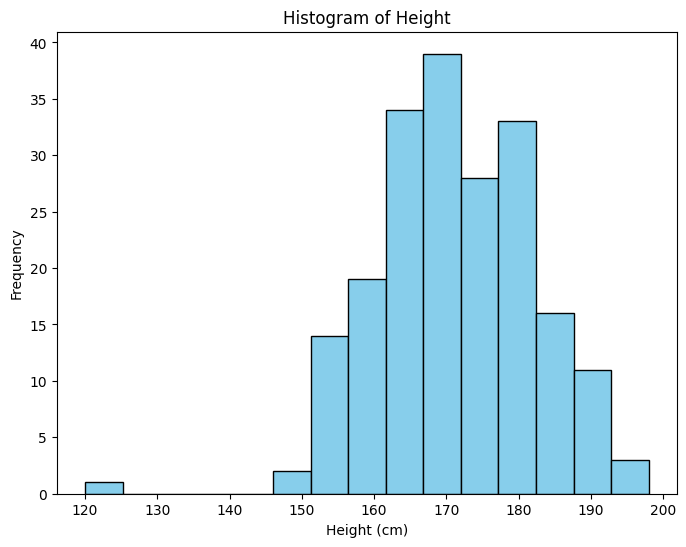

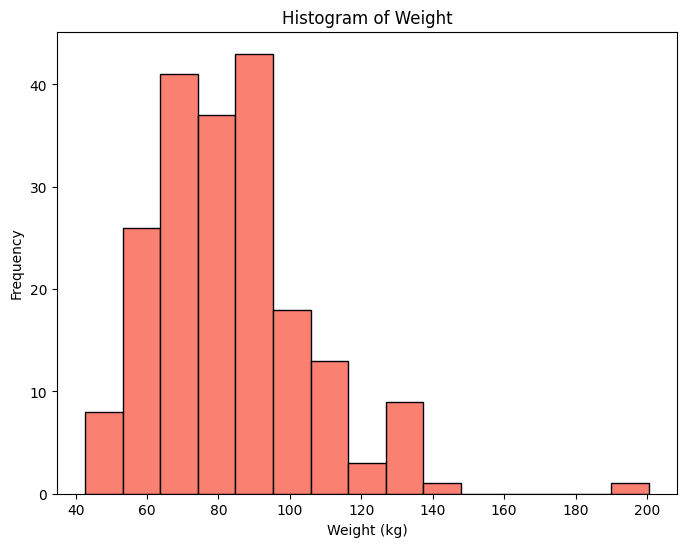

In [72]:
# Plot histogram for Height
plt.figure(figsize=(8, 6))
plt.hist(df_sam_2['Height_(cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(False)  # Removing grid lines
plt.show()

# Plot histogram for Weight
plt.figure(figsize=(8, 6))
plt.hist(df_sam_2['Weight_(kg)'], bins=15, color='salmon', edgecolor='black')
plt.title('Histogram of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(False)  # Removing grid lines
plt.show()


In [73]:
# Tables for Smoking_History and Heart Disease
print(pd.crosstab(df_sam_2['Smoking_History'], columns='count'))
print()
print(pd.crosstab(df_sam_2['Heart_Disease'], columns='count'))

col_0            count
Smoking_History       
0                  119
1                   81

col_0          count
Heart_Disease       
0                188
1                 12


In [74]:
# Check for missing values in 'Height_(cm)' column
missing_height = df_sam_2['Height_(cm)'].isnull().sum()
print("Missing values in 'Height_(cm)':", missing_height)

# Check for missing values in 'Weight_(kg)' column
missing_weight = df_sam_2['Weight_(kg)'].isnull().sum()
print("Missing values in 'Weight_(kg)':", missing_weight)

Missing values in 'Height_(cm)': 0
Missing values in 'Weight_(kg)': 0


## Q 3.2

**1. Weight_(kg) & Height_(cm):**
* From both the histograms depicting weight and height, it is evident that they follow a roughly normal distribution. Additionally, outliers are present, and the distribution appears to be approximately symmetrical.

**2. Smoking_History & Heart Disease:**
* No outliers since variables are binary
* We can see that data is not symmetrical.
* No missing values (sum up to 200).


## Q 3.3

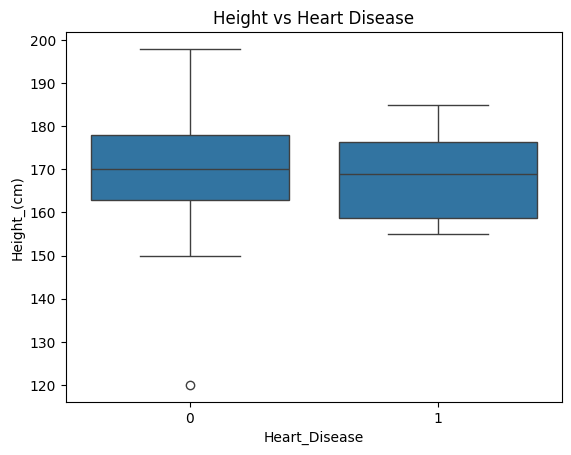

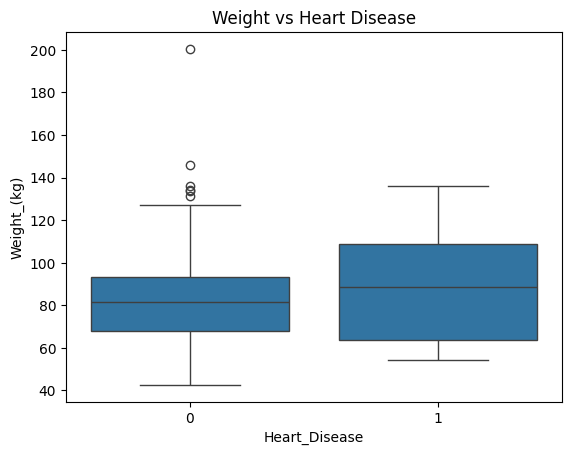

In [75]:
# Height vs Heart Disease
sns.boxplot(x=df_sam_2['Heart_Disease'], y=df_sam_2['Height_(cm)'])
plt.title('Height vs Heart Disease')
plt.show()

# Weight vs Heart Disease
sns.boxplot(x=df_sam_2['Heart_Disease'], y=df_sam_2['Weight_(kg)'])
plt.title('Weight vs Heart Disease')
plt.show()


* **In interpreting the box plot for weight versus heart disease, it suggests that individuals weighing above 90 kg are more likely to have heart disease. However, in the case of height, the box plot indicates similar distributions for individuals with and without heart disease, making it challenging to discern the extent of influence of this variable on heart disease.**
* **At present, it appears that weight exerts a greater influence on heart disease compared to height.**


## Q 4

In [120]:
x = df_sam_2[['Height_(cm)', 'Weight_(kg)', 'Smoking_History']]
x.insert(0, 'x0', 1)
x = x.to_numpy()
y = df_sam_2['Heart_Disease'].to_numpy()
reg = LogisticRegression(penalty='none', fit_intercept=False).fit(x, y)
b = reg.coef_[0]

# print y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4
print(f"y = {b[0]} + {b[1]} * x1 + {b[2]} * x2 + {b[3]} * x3")

y = 2.4444399234612795 + -0.04108272001334168 * x1 + 0.016468727233264265 * x2 + 0.7584120417421801 * x3


**As we saw, in logistic regression we look at odds ratio:**
* if x1 (Height) increase by 1, the influence is exp(b1) = 0.959
* if x2 (Weight) increase by 1, the influence is exp(b2) = 1.01
* if x3 (Smoking History) is 1, the influence is exp(b3) = 2.13

## Q 5

In [122]:
# Calculating b_ols based on all of the data:
x_all = df_original_2[['Height_(cm)', 'Weight_(kg)', 'Smoking_History']]
x_all.insert(0, 'x0', 1)
x_all = x_all.to_numpy()
y_all = df_original_2['Heart_Disease'].to_numpy()
reg = LogisticRegression(penalty='none', fit_intercept=False).fit(x_all, y_all)
b_all = reg.coef_[0]


In [123]:
def pi(i):
    bT_x = b.T @ x[i]
    return np.exp(bT_x) / (1 + np.exp(bT_x))

In [124]:
diagonal = [pi(i)*(1 - pi(i)) for i in range(x.shape[0])]
V = np.diag(diagonal)
C = np.linalg.inv(x.T @ V @ x)

for i in range(4):
    se = (C[i][i])**0.5
    CI_beta_i = [b[i] - z_alpha * se, b[i] + z_alpha * se]
    print(f"CI for beta{i} is: {CI_beta_i}")
    print(f"Is the CI of beta{i} in sampled data contains the estimator of all data: "
          f"{b_all[i] > CI_beta_i[0] and b_all[i] < CI_beta_i[1]}\n")

    

CI for beta0 is: [-6.510441541028046, 11.399321387950605]
Is the CI of beta0 in sampled data contains the estimator of all data: True

CI for beta1 is: [-0.09910818261618906, 0.016942742589505698]
Is the CI of beta1 in sampled data contains the estimator of all data: True

CI for beta2 is: [-0.008373682494362003, 0.04131113696089053]
Is the CI of beta2 in sampled data contains the estimator of all data: True

CI for beta3 is: [-0.4383951287694944, 1.9552192122538545]
Is the CI of beta3 in sampled data contains the estimator of all data: True



# Q 6

In [125]:
# Adding more variables to the model z12 = x1*x2, z13 = x1*x3 and z23 = x2*x3:
df_sam_2['z12'] = df_sam_2['Height_(cm)'] * df_sam_2['Weight_(kg)']
df_sam_2['z13'] = df_sam_2['Height_(cm)'] * df_sam_2['Smoking_History']
df_sam_2['z23'] = df_sam_2['Weight_(kg)'] * df_sam_2['Smoking_History']


# calculate the coefficient b1, b2, b3, b4, b5, b6, b7 and the intercept a (b0)
x_new = df_sam_2[['Height_(cm)', 'Weight_(kg)', 'Smoking_History', 'z12', 'z13', 'z23']]
x_new.insert(0, 'x0', 1)
x_new = x_new.to_numpy()
y_new = df_sam_2['Heart_Disease'].to_numpy()

model_new = LogisticRegression(penalty='none', fit_intercept=False).fit(x_new, y_new)
b_new = model_new.coef_[0]
print(f"y = {b_new[0]} + {b_new[1]} * x1 + {b_new[2]} * x2 + {b_new[3]} * x3 +       "
      f"{b_new[4]} * x4 + {b_new[5]} * x5 + {b_new[6]} * x6")


y = 0.0005664856558846244 + -0.025240313195967885 * x1 + 0.032756713643846906 * x2 + 0.00021302007656787069 * x3 +       -0.00011224964004561289 * x4 + 0.0032019885033792704 * x5 + 0.00266568501382226 * x6


In [129]:
# Likelihood Ratio Test between the models
# H0: b12 = b13 = b23 = 0
# H1: b12!=0 or b13!=0 or b23!=0
# Chi has 3 degrees of freedom because we have 3 more variables (z12, z13, z23) in the alternative model.
pi_h1 = np.exp(x_new.dot(b_new.T)) / (1 + np.exp(x_new.dot(b_new.T)))
l_h1 = pi_h1 ** y_new * (1 - pi_h1) ** (1 - y_new)

pi_h0 = np.exp(x.dot(b.T)) / (1 + np.exp(x.dot(b.T)))
l_h0 = pi_h0 ** y * (1 - pi_h0) ** (1 - y)

likelihood_ratio = 2 * (np.sum(np.log(l_h1)) - np.sum(np.log(l_h0)))


print(f'Reject H0: {np.abs(likelihood_ratio) > chi2.ppf(0.95, 3)}')

Reject H0: False


In [132]:
# Calculating AIC:
AIC_h0 = np.sum(y * x.dot(b.T) - np.log(1 + np.exp(x.dot(b.T)))) - 4
AIC_h1 = np.sum(y * x_new.dot(b_new.T) - np.log(1 + np.exp(x_new.dot(b_new.T)))) - 7

print("AIC for the old model (h0):", AIC_h0)
print("AIC for the new model with interactions (h1):", AIC_h1)

AIC for the old model (h0): -47.45359618653955
AIC for the new model with interactions (h1): -50.550026010904915


__As we can see by the Likelihood Ratio Test, we don't reject H0, that means that b12 = b13 = b23 = 0
Moreover, according to the AIC, the old model is slightly better than the new model.__

## Q 7

In [252]:
df_q_7 =  pd.read_csv('/Users/yardennahum/Statistics 2/Project 1/CVD_cleaned.csv')
df_q_7
num_cols = df_q_7.shape[1]
print("Number of columns:", num_cols)

Number of columns: 19


In [260]:
# Data has only 19 cols, so we need to extend it:
df_q_7 = df_q_7.sample(n=200, random_state=1)

df_q_7['Heart_Disease'].replace({'Yes': 1, 'No': 0}, inplace=True)

# x = df_q_7[['Height_(cm)', 'Smoking_History','Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption']]
y = df_q_7['Heart_Disease'].to_numpy()


In [261]:
# Adding all first order polynomials to the data using combinations itertools
from itertools import combinations

# Ensure numeric columns
numeric_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption',
                'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
df_q_7[numeric_cols] = df_q_7[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Data has only 19 cols, so we need to extend it:
df_q_7 = df_q_7.sample(n=200, random_state=42)

# Convert categorical columns to binary
binary_cols = ['Smoking_History', 'Heart_Disease', 'Exercise', 'Skin_Cancer',
               'Other_Cancer', 'Arthritis', 'Sex', 'Depression']
for col in binary_cols:
    df_q_7[col] = df_q_7[col].replace(['Yes', 'No', 'Male', 'Female'], [1, 0, 1, 0])

# Define columns
cols = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex'] + numeric_cols

# Create DataFrame x
x = df_q_7[cols].copy()

# Add polynomial terms
for i in range(2, 5):
    for combo in combinations(cols, i):
        col_name = '*'.join(combo)
        x[col_name] = x[list(combo)].prod(axis=1)

# Insert intercept column
x.insert(0, 'x0', 1)
x = x.iloc[:, :31]

In [262]:
x

,x0,Exercise,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,Exercise*BMI,Exercise*Alcohol_Consumption,Exercise*Fruit_Consumption,Exercise*Green_Vegetables_Consumption,Exercise*FriedPotato_Consumption,Skin_Cancer*Other_Cancer,Skin_Cancer*Depression,Skin_Cancer*Arthritis,Skin_Cancer*Sex,Skin_Cancer*Height_(cm)
210213,1,0,0,0,0,0,1,193.0,99.79,26.78,...,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0
281875,1,1,0,1,1,0,0,155.0,63.50,26.45,...,26.45,0.0,30.0,30.0,2.0,0,0,0,0,0.0
244775,1,1,0,0,0,0,0,168.0,57.15,20.34,...,20.34,8.0,90.0,8.0,1.0,0,0,0,0,0.0
77282,1,1,1,0,0,1,0,155.0,70.31,29.29,...,29.29,0.0,16.0,12.0,1.0,0,0,1,0,155.0
208149,1,1,0,0,0,0,1,183.0,102.06,30.52,...,30.52,9.0,15.0,60.0,30.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200843,1,1,0,0,0,0,1,191.0,79.38,21.87,...,21.87,4.0,30.0,60.0,2.0,0,0,0,0,0.0
284557,1,1,0,0,1,1,0,155.0,62.60,26.07,...,26.07,4.0,30.0,12.0,0.0,0,0,0,0,0.0
55363,1,1,0,0,0,0,0,168.0,71.21,25.34,...,25.34,5.0,30.0,30.0,10.0,0,0,0,0,0.0
177158,1,0,0,0,0,1,1,165.0,81.65,29.95,...,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0


In [263]:
def AIC(x, y, b):
    sum = 0
    for x_i, y_i in zip(x, y):
        sum += y_i * x_i.dot(b.T) - np.log(1 + np.exp(x_i.dot(b.T)))
    return sum - len(b)


In [264]:
def forward_stepwise_Regression(metric):
    variables = set(x.columns)
    selected_variables = []
    last_AIC = -np.inf
    best_AIC = -np.inf
    
    for var1 in variables:
        for var2 in variables:
            if var2 not in selected_variables:
                x_temp = x[selected_variables + [var2]].to_numpy()
                model = LogisticRegression(penalty='none', fit_intercept=False).fit(x_temp, y)
                temp_AIC = metric(x_temp, y, model.coef_[0])
                if temp_AIC > best_AIC:
                    best_AIC = temp_AIC
                    best_v = var2
                    
        if last_AIC == best_AIC:
            break
        else:
            last_AIC = best_AIC
            selected_variables.append(best_v)
            
    print(f'Selected Variables:\n{selected_variables}\n')
    print(f'Metric = {best_AIC}')
    
           
# Doing forward with AIC as a metric                
forward_stepwise_Regression(AIC)

Selected Variables:
['x0', 'Exercise*Alcohol_Consumption', 'Exercise', 'Exercise*Arthritis', 'Skin_Cancer*Arthritis']

Metric = -41.544933899304354


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [286]:
def backward_stepwise_Regression(metric):
    variables = set(x.columns)
    selected_variables = list(variables)
    last_AIC = -np.inf
    best_AIC = -np.inf
    
    for var1 in variables:
        for var2 in variables:
            if var2 in selected_variables:
                selected_variables.remove(var2)
                x_temp = x[selected_variables].to_numpy()
                model = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000).fit(x_temp, y)
                temp_AIC = metric(x_temp, y, model.coef_[0])
                if temp_AIC > best_AIC:
                    best_AIC = temp_AIC
                    best_v = var2
                selected_variables.append(var2)
                    
        if last_AIC == best_AIC:
            break
        else:
            last_AIC = best_AIC
            selected_variables.remove(best_v)
            
    print(f'Selected Variables:\n{selected_variables}\n')
    print(f'Metric = {best_AIC}')


